# Clustering Exercises

### 1. Clustering with the Iris Dataset

### Using this lesson as a guide, perform clustering on the iris dataset.

### a. Choose features other than the ones used in the lesson.

In [1]:
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from acquire import acquire_zillow_data, get_iris_data, get_mall_data

In [2]:
iris = get_iris_data()
iris.head()

,species_id,measurement_id,sepal_length,sepal_width,petal_length,petal_width,species_name
0,1,1,5.1,3.5,1.4,0.2,setosa
1,1,2,4.9,3.0,1.4,0.2,setosa
2,1,3,4.7,3.2,1.3,0.2,setosa
3,1,4,4.6,3.1,1.5,0.2,setosa
4,1,5,5.0,3.6,1.4,0.2,setosa


In [3]:
X = iris[['petal_width', 'sepal_width']]

kmeans = KMeans(n_clusters = 3)

kmeans.fit(X)
kmeans.predict(X)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2,
       2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int32)

In [4]:
iris['cluster'] = kmeans.predict(X)

In [5]:
iris.sample(10)

,species_id,measurement_id,sepal_length,sepal_width,petal_length,petal_width,species_name,cluster
6,1,7,4.6,3.4,1.4,0.3,setosa,0
83,2,84,6.0,2.7,5.1,1.6,versicolor,1
13,1,14,4.3,3.0,1.1,0.1,setosa,0
140,3,141,6.7,3.1,5.6,2.4,virginica,2
114,3,115,5.8,2.8,5.1,2.4,virginica,2
100,3,101,6.3,3.3,6.0,2.5,virginica,2
51,2,52,6.4,3.2,4.5,1.5,versicolor,1
42,1,43,4.4,3.2,1.3,0.2,setosa,0
27,1,28,5.2,3.5,1.5,0.2,setosa,0
87,2,88,6.3,2.3,4.4,1.3,versicolor,1


### b. Visualize the results of your clustering.

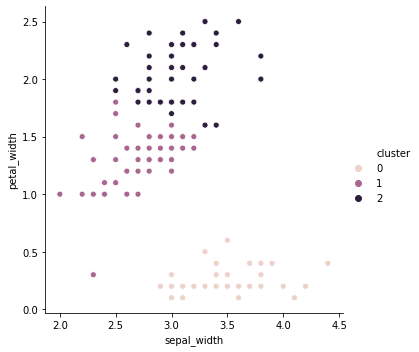

In [6]:
sns.relplot(data=iris, x='sepal_width', y='petal_width', hue='cluster')

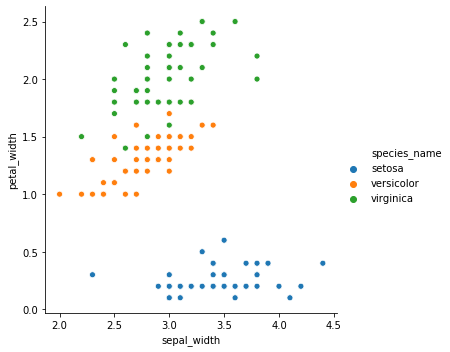

In [7]:
sns.relplot(data=iris, x='sepal_width', y='petal_width', hue='species_name')

### c. Use the elbow method to visually select a good value for k.

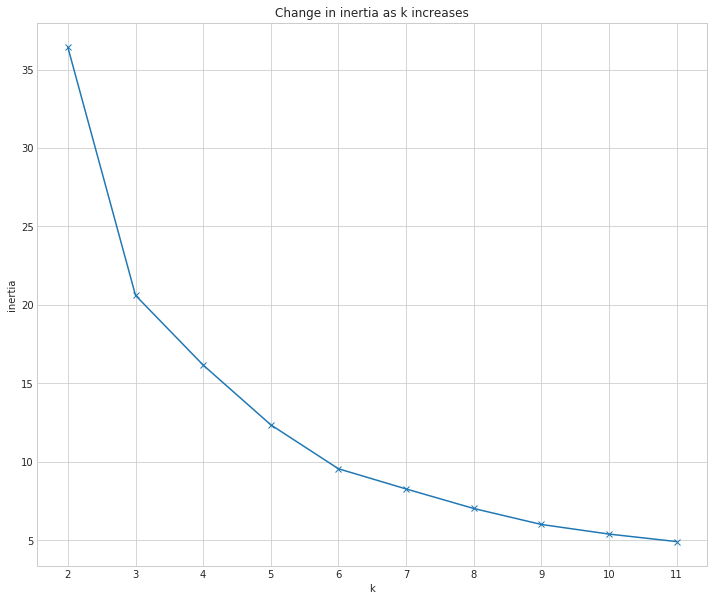

In [8]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(12,10))
    pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

The biggest change in inertia happens between 3-6 and the biggest change happens between 5-6 so I will be using 5 clusters.

### d. Repeat the clustering, this time with 3 different features.

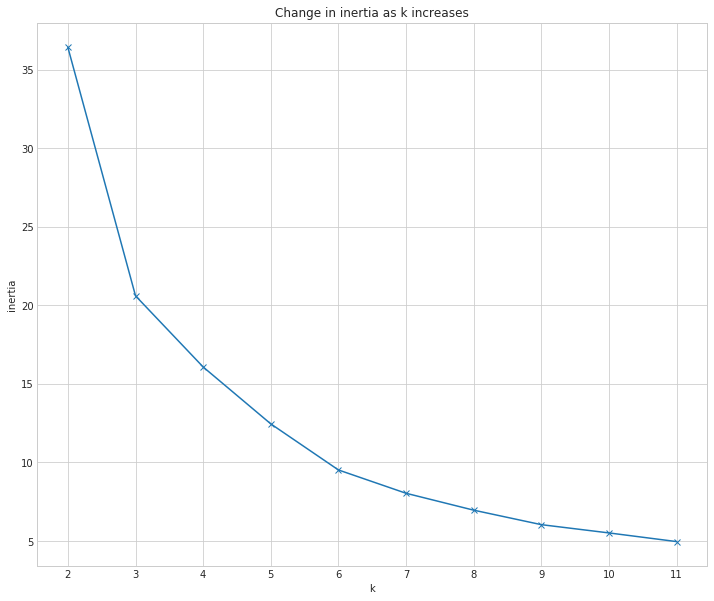

In [9]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(12,10))
    pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

In [10]:
X = iris[['petal_width', 'sepal_width', 'sepal_length']]
kmeans = KMeans(n_clusters = 3)
kmeans.fit(X)
kmeans.predict(X)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 0, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2], dtype=int32)

In [11]:
iris['cluster'] = kmeans.predict(X)
iris.sample(10)

,species_id,measurement_id,sepal_length,sepal_width,petal_length,petal_width,species_name,cluster
86,2,87,6.7,3.1,4.7,1.5,versicolor,0
44,1,45,5.1,3.8,1.9,0.4,setosa,1
99,2,100,5.7,2.8,4.1,1.3,versicolor,2
121,3,122,5.6,2.8,4.9,2.0,virginica,2
74,2,75,6.4,2.9,4.3,1.3,versicolor,2
58,2,59,6.6,2.9,4.6,1.3,versicolor,0
33,1,34,5.5,4.2,1.4,0.2,setosa,1
124,3,125,6.7,3.3,5.7,2.1,virginica,0
76,2,77,6.8,2.8,4.8,1.4,versicolor,0
77,2,78,6.7,3.0,5.0,1.7,versicolor,0


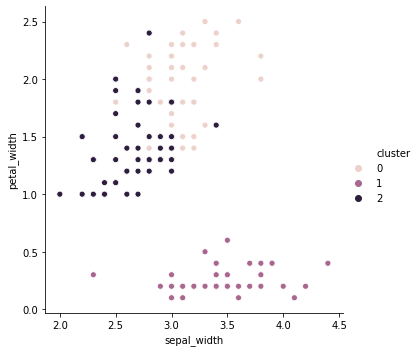

In [12]:
sns.relplot(data=iris, x='sepal_width', y='petal_width', hue='cluster')

### 2. Use the techniques discussed in this lesson, as well as the insights gained from the exploration exercise to perform clustering on the mall customers dataset. Be sure to visualize your results!

In [13]:
mall = get_mall_data()
mall.head()

,customer_id,gender,age,annual_income,spending_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [14]:
X = mall[['annual_income', 'age']]
kmeans = KMeans(n_clusters = 3)
kmeans.fit(X)
kmeans.predict(X)

array([1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 1, 1, 2, 1, 1, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 1,
       2, 2, 1, 1, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 1,
       2, 2, 2, 1, 2, 2, 0, 0, 2, 0, 2, 0, 0, 2, 2, 0, 2, 0, 2, 2, 2, 2,
       2, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int32)

In [15]:
mall['cluster'] = kmeans.predict(X)
mall.head()

,customer_id,gender,age,annual_income,spending_score,cluster
0,1,Male,19,15,39,1
1,2,Male,21,15,81,1
2,3,Female,20,16,6,1
3,4,Female,23,16,77,1
4,5,Female,31,17,40,1


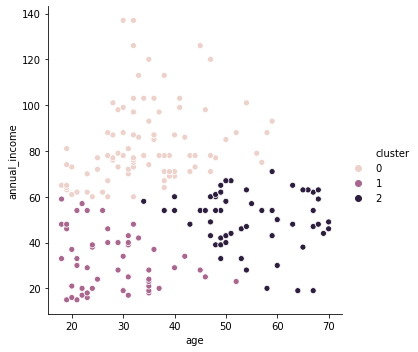

In [16]:
sns.relplot(data=mall, x='age', y='annual_income', hue='cluster')

### 3. How does scaling impact the results of clustering?

Compare k-means clustering results on scaled and unscaled data. You can show how the resulting clusters differ either with descriptive statistics or visually.

In [17]:
mall_scaled = mall.copy()

In [18]:
scaler = MinMaxScaler()
mall_scaled[['age', 'annual_income']] = scaler.fit_transform(mall_scaled[['age', 'annual_income']])
mall_scaled.head()

,customer_id,gender,age,annual_income,spending_score,cluster
0,1,Male,0.019231,0.000000,39,1
1,2,Male,0.057692,0.000000,81,1
2,3,Female,0.038462,0.008197,6,1
3,4,Female,0.096154,0.008197,77,1
4,5,Female,0.250000,0.016393,40,1


In [20]:
X = mall_scaled[['age', 'annual_income']]
kmeans_scaled = KMeans(n_clusters = 3)
kmeans_scaled.fit(X)
kmeans_scaled.predict(X)
mall_scaled['cluster'] = kmeans_scaled.predict(X)
mall_scaled.sample(10)

,customer_id,gender,age,annual_income,spending_score,cluster
196,197,Female,0.519231,0.909836,28,1
8,9,Male,0.884615,0.032787,3,0
175,176,Female,0.230769,0.598361,86,1
48,49,Female,0.211538,0.204918,42,2
140,141,Female,0.750000,0.491803,5,0
189,190,Female,0.346154,0.721311,85,1
92,93,Male,0.576923,0.368852,49,0
126,127,Male,0.480769,0.459016,35,1
19,20,Female,0.326923,0.065574,98,2
145,146,Male,0.192308,0.508197,97,1


Text(0.5, 1, 'Scaled')

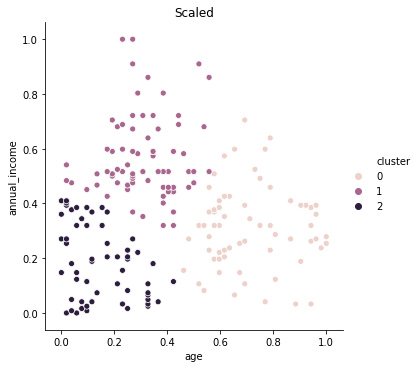

In [23]:
sns.relplot(data = mall_scaled, x='age', y='annual_income', hue='cluster')
plt.title('Scaled')

Text(0.5, 1, 'Unscaled')

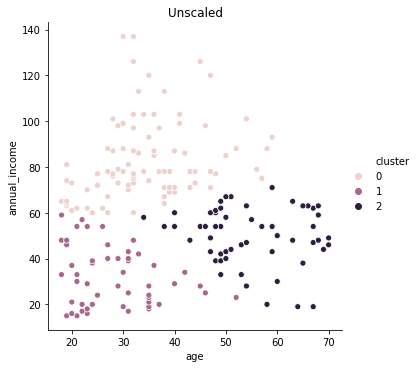

In [24]:
sns.relplot(data=mall, x='age', y='annual_income', hue='cluster')
plt.title('Unscaled')

Unscaled vs Scaled:  

Cluster 0:  
Minimum annual income went down on scaled a tiny bit. Maximum age went way down on scaled data.

Cluster 1:  
Slight decrease on maximum annual income and a decent decrease on maximum age from unscaled to scaled data.

Cluster 2:  
The scaled data has a lower maximum annual income as well as a lower minimum age than the unscaled data.